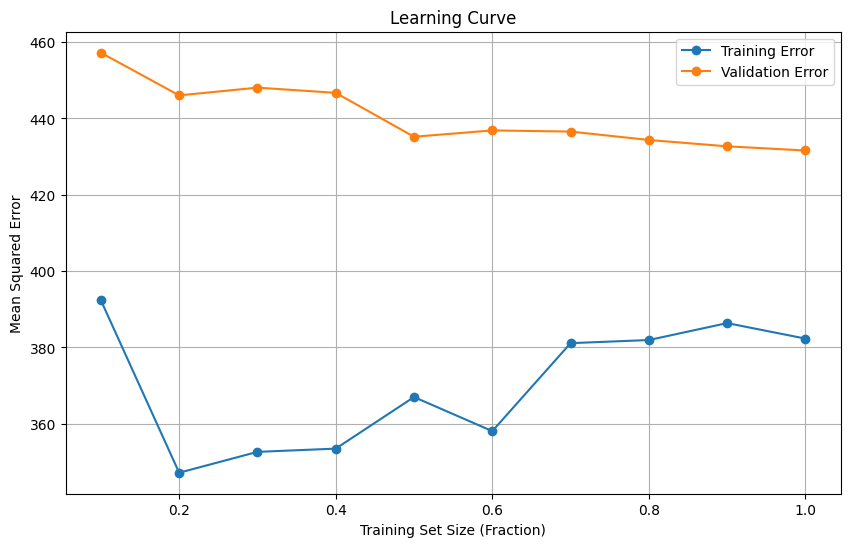

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Step 1: Generate Sample Data
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize Model
model = LinearRegression()

# Step 3: Define Function to Compute Learning Curve
def plot_learning_curve(model, X_train, y_train, X_val, y_val):
    train_sizes = np.linspace(0.1, 1.0, 10)  # Train on increasing fractions of data
    train_errors = []
    val_errors = []

    for train_size in train_sizes:
        # Select a subset of training data
        subset_size = int(train_size * len(X_train))
        X_train_subset = X_train[:subset_size]
        y_train_subset = y_train[:subset_size]
        
        # Train the model
        model.fit(X_train_subset, y_train_subset)
        
        # Calculate training error
        y_train_pred = model.predict(X_train_subset)
        train_error = mean_squared_error(y_train_subset, y_train_pred)
        train_errors.append(train_error)
        
        # Calculate validation error
        y_val_pred = model.predict(X_val)
        val_error = mean_squared_error(y_val, y_val_pred)
        val_errors.append(val_error)

    # Step 4: Plot Learning Curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label="Training Error", marker='o')
    plt.plot(train_sizes, val_errors, label="Validation Error", marker='o')
    plt.xlabel("Training Set Size (Fraction)")
    plt.ylabel("Mean Squared Error")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid()
    plt.show()

# Step 5: Call the Function
plot_learning_curve(model, X_train, y_train, X_val, y_val)

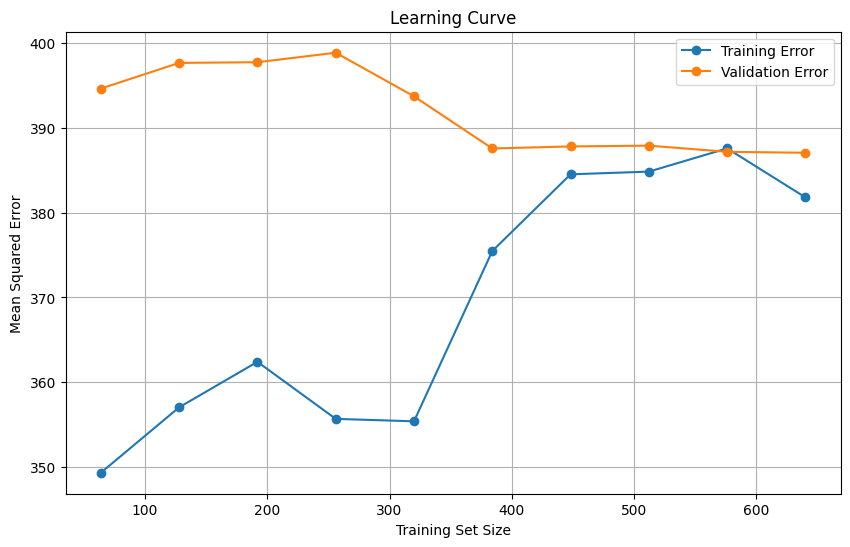

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model to evaluate
model = LinearRegression()

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Convert negative MSE to positive for plotting
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Error', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()
